#  Deep Learning Hyper-parameters

## Regularization

In [2]:
#import the packages
import pandas as pd
import numpy as np

The data set

In [3]:
x=[-0.99768,-0.69574,-0.40373,-0.10236,0.22024,0.47742,0.82229]
y=[2.0885,1.1646,0.3287,0.46013,0.44808,0.10013,-0.32952]

input_data = pd.DataFrame(list(zip(x, y)), columns =['x', 'y']) 
print(input_data)

         x        y
0 -0.99768  2.08850
1 -0.69574  1.16460
2 -0.40373  0.32870
3 -0.10236  0.46013
4  0.22024  0.44808
5  0.47742  0.10013
6  0.82229 -0.32952


Plotting the data

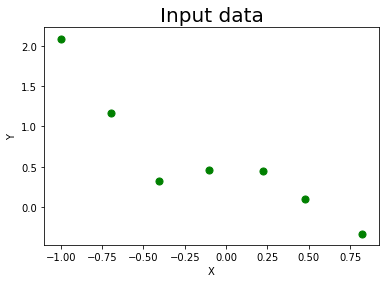

In [28]:
x = np.array(input_data.x)
y = input_data.y
#scatter plot x and y
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Input data", fontsize=20)
plt.scatter(x,y,s=50,c="g")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Usual Regression Model building - Without Regualrization

#### Simple Linear Regression

In [51]:
import statsmodels.api as sm
x1 = sm.add_constant(x)
m1 = sm.OLS(y,x1).fit()
#SSE
print("m1 SSE", m1.ssr)

m1 SSE 0.7107401451797566


#### Second Order polynomial regression

In [52]:
x2 = sm.add_constant(np.column_stack([x,np.square(x)]))
m2 = sm.OLS(y,x2).fit()
print("m2 SSE", m2.ssr)

m2 SSE 0.457231720521299


#### Fifth order polynomial

In [53]:
x3 = sm.add_constant(np.column_stack([x, np.power(x,2),np.power(x,3),np.power(x,4),np.power(x,5)]))
m3 = sm.OLS(y,x3).fit()
print("m3 SSE", m3.ssr)

m3 SSE 0.010562888801624625


### Regression Model building - With Regualrization

In [69]:
X = x3
y = np.array(y)
n_col = X.shape[1]
d = np.identity(n_col)
d[0,0] = 0
w = []

reg =0 
w.append(np.linalg.lstsq(X.T.dot(X) + reg * d, X.T.dot(y))[0])

reg =1 
w.append(np.linalg.lstsq(X.T.dot(X) + reg * d, X.T.dot(y))[0])


reg =10 
w.append(np.linalg.lstsq(X.T.dot(X) + reg * d, X.T.dot(y))[0])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and

In [70]:
print("Regularized weights  lambda=0 \n", w[0])
print("Regularized weights  lambda=1 \n", w[1])
print("Regularized weights  lambda=10 \n", w[2])

Regularized weights  lambda=0 
 [ 0.47252877  0.68135289 -1.38012842 -5.97768747  2.44173268  4.73711433]
Regularized weights  lambda=1 
 [ 0.3975953  -0.42066637  0.12959211 -0.3974739   0.17525553 -0.33938772]
Regularized weights  lambda=10 
 [ 0.52047074 -0.18250706  0.06064258 -0.14817721  0.07433006 -0.12795737]


In [71]:
#new weights and older weights
print("Regularized Weights With lambda = 0 \n", list(w[0]))
print("Standard Weights With inbuilt package \n",list(m3.params))

Regularized Weights With lambda = 0 
 [0.4725287728743442, 0.6813528948567631, -1.3801284186124971, -5.9776874674697105, 2.441732684793457, 4.737114334831566]
Standard Weights With inbuilt package 
 [0.47252877287434003, 0.6813528948567651, -1.3801284186124536, -5.977687467469684, 2.4417326847934, 4.7371143348315226]


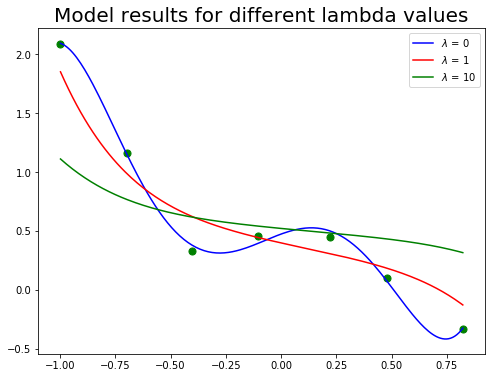

In [72]:
#ploat all these three models
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Model results for different lambda values', fontsize=20)
plt.scatter(x,y, s = 50, c = "g")
x_new = np.linspace(x.min(), x.max(), 200)
plt.plot(x_new, np.poly1d(np.polyfit(x, X.dot(w[0]), 5))(x_new),label='$\lambda$ = 0', c = "b")
plt.plot(x_new, np.poly1d(np.polyfit(x, X.dot(w[1]), 5))(x_new),label='$\lambda$ = 1', c = "r")
plt.plot(x_new, np.poly1d(np.polyfit(x, X.dot(w[2]), 5))(x_new),label='$\lambda$ = 10', c = "g")
plt.legend(loc='upper right');
plt.show()

#### Choosing the regularization λ

In [74]:
#weights
print("Final Weights \n", w[1])
#perdiction
pred = X.dot(w[1])
##SSE
SSE_Final = sum(np.square(y-pred))
print("Final SSE ", SSE_Final)

Final Weights 
 [ 0.3975953  -0.42066637  0.12959211 -0.3974739   0.17525553 -0.33938772]
Final SSE  0.24363202160352718


## Regularization in Keras

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
## MNIST data The data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes=10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)

print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

(60000, 784) train input samples
(10000, 784) test input samples
(60000, 10) train output samples
(10000, 10) test output samples


## Model without Regularization 

In [3]:
model = keras.Sequential()
model.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3747 - categorical_accuracy: 0.8954
Epoch 2/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1664 - categorical_accuracy: 0.9496
Epoch 3/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.1161 - categorical_accuracy: 0.9646
Epoch 4/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0888 - categorical_accuracy: 0.9732
Epoch 5/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0724 - categorical_accuracy: 0.9775
Epoch 6/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0612 - categorical_accuracy: 0.9815
Epoch 7/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0507 - categorical_accuracy: 0.9841
Epoch 8/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0450 - categorical_accuracy: 0.9865
Epoch 9/10
60000/60000 [

In [5]:
#Final Results
loss, acc = model.evaluate(x_train,  y_train, verbose=2)
print("Train Accuracy: {:5.2f}%".format(100*acc))

loss, acc = model.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

60000/1 - 2s - loss: 0.0114 - categorical_accuracy: 0.9937
Train Accuracy: 99.37%
10000/1 - 0s - loss: 0.0377 - categorical_accuracy: 0.9790
Test Accuracy: 97.90%


## Model with Regularization 

In [4]:
from tensorflow.keras import regularizers
model_r = keras.Sequential()
model_r.add(layers.Dense(256, activation='sigmoid', input_shape=(784,), kernel_regularizer=regularizers.l2(0.01)))
model_r.add(layers.Dense(128, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))
model_r.add(layers.Dense(10, activation='softmax'))
model_r.summary()

NameError: name 'keras' is not defined

In [41]:
model_r.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model_r.fit(x_train, y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 142us/sample - loss: 1.7637 - accuracy: 0.6496
Epoch 2/10
60000/60000 [==============================] - 7s 116us/sample - loss: 1.3367 - accuracy: 0.7589
Epoch 3/10
60000/60000 [==============================] - 8s 126us/sample - loss: 1.2276 - accuracy: 0.7814
Epoch 4/10
60000/60000 [==============================] - 8s 131us/sample - loss: 1.1650 - accuracy: 0.7890
Epoch 5/10
60000/60000 [==============================] - 8s 127us/sample - loss: 1.1267 - accuracy: 0.7947
Epoch 6/10
60000/60000 [==============================] - 8s 132us/sample - loss: 1.0907 - accuracy: 0.7995
Epoch 7/10
60000/60000 [==============================] - 7s 119us/sample - loss: 1.0577 - accuracy: 0.8080
Epoch 8/10
60000/60000 [==============================] - 7s 123us/sample - loss: 1.0297 - accuracy: 0.8113
Epoch 9/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.9998 - accuracy: 0.8188
Epoch

In [36]:
#Final Results
loss, acc = model_r.evaluate(x_train,  y_train, verbose=2)
print("Train Accuracy: {:5.2f}%".format(100*acc))

loss, acc = model_r.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

60000/1 - 2s - loss: 0.8496 - accuracy: 0.8510
Train Accuracy: 85.10%
10000/1 - 1s - loss: 0.8128 - accuracy: 0.8569
Test Accuracy: 85.69%


## Model with Dropout 

In [62]:
from tensorflow.keras.layers import Dropout
model_rd = keras.Sequential()

model_rd.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
model_rd.add(Dropout(0.7))

model_rd.add(layers.Dense(128, activation='sigmoid'))
model_rd.add(Dropout(0.6))

model_rd.add(layers.Dense(10, activation='softmax'))
model_rd.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [3]:
model_rd.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model_rd.fit(x_train, y_train,epochs=10)

NameError: name 'model_rd' is not defined

In [64]:
#Final Results
loss, acc = model_rd.evaluate(x_train,  y_train, verbose=2)
print("Train Accuracy: {:5.2f}%".format(100*acc))

loss, acc = model_rd.evaluate(x_test,  y_test, verbose=2)
print("Test Accuracy: {:5.2f}%".format(100*acc))

60000/1 - 5s - loss: 0.0806 - accuracy: 0.9598
Train Accuracy: 95.98%
10000/1 - 1s - loss: 0.0875 - accuracy: 0.9586
Test Accuracy: 95.86%


## Early Stopping

In [101]:
model_re = keras.Sequential()
model_re.add(layers.Dense(64, activation='sigmoid', input_shape=(784,)))
model_re.add(layers.Dense(64, activation='sigmoid'))
model_re.add(layers.Dense(10, activation='softmax'))
model_re.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_107 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_108 (Dense)            (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [102]:
model_re.compile(loss='categorical_crossentropy', metrics=['accuracy'])
#Enable saving checkpoints
# Checkpoint the weights when validation accuracy improves
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py

# checkpoint
#dont forget to create a directory to store the checkpoints:"early_stopping_checkpoints"
checkpoint = ModelCheckpoint(r"D:\Google Drive\Training\Book\0.Chapters\Chapter10 Deep Learning Hyperparameters\4.Code\epoch-{epoch:02d}.hdf5")
model_re.fit(x_train, y_train,epochs=10,validation_data=(x_test, y_test),callbacks=[checkpoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.5318 - accuracy: 0.8652 - val_loss: 0.2367 - val_accuracy: 0.9296
Epoch 2/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2095 - accuracy: 0.9377 - val_loss: 0.1877 - val_accuracy: 0.9429
Epoch 3/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1595 - accuracy: 0.9522 - val_loss: 0.1510 - val_accuracy: 0.9558
Epoch 4/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1319 - accuracy: 0.9606 - val_loss: 0.1299 - val_accuracy: 0.9613
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1129 - accuracy: 0.9663 - val_loss: 0.1180 - val_accuracy: 0.9653
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0995 - accuracy: 0.9702 - val_loss: 0.1109 - val_accuracy: 0.9668
Epoch 7/10
60000/60000 [==============================] 

In [104]:
model_re.load_weights(r"D:\Google Drive\Training\Book\0.Chapters\Chapter10 Deep Learning Hyperparameters\4.Code\\epoch-07.hdf5")# change the file name to the epoch you want to load

In [107]:
model_re = keras.Sequential()
model_re.add(layers.Dense(64, activation='sigmoid', input_shape=(784,)))
model_re.add(layers.Dense(64, activation='sigmoid'))
model_re.add(layers.Dense(10, activation='softmax'))

model_re.compile(loss='categorical_crossentropy', metrics=['accuracy'])

es = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              min_delta=0.01,
                              patience=2)

#train the model with call back method
model_re.fit(x_train, y_train, epochs=30,validation_data=(x_test, y_test), callbacks=[es])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 73us/sample - loss: 0.5261 - accuracy: 0.8670 - val_loss: 0.2403 - val_accuracy: 0.9286
Epoch 2/30
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2141 - accuracy: 0.9359 - val_loss: 0.1847 - val_accuracy: 0.9439
Epoch 3/30
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1619 - accuracy: 0.9515 - val_loss: 0.1423 - val_accuracy: 0.9578
Epoch 4/30
60000/60000 [==============================] - 4s 69us/sample - loss: 0.1300 - accuracy: 0.9608 - val_loss: 0.1248 - val_accuracy: 0.9629
Epoch 5/30
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1099 - accuracy: 0.9666 - val_loss: 0.1148 - val_accuracy: 0.9659


## Activation Functions

In [6]:
model2 = keras.Sequential()
model2.add(layers.Dense(15, activation='sigmoid', input_shape=(784,)))
model2.add(layers.Dense(15, activation='relu'))
model2.add(layers.Dense(15, activation='tanh'))
model2.add(layers.Dense(15, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_9 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_10 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_11 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                160       
Total params: 12,655
Trainable params: 12,655
Non-trainable params: 0
_________________________________________________________________


In [9]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.1521 - accuracy: 0.9554
Epoch 2/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1477 - accuracy: 0.9574
Epoch 3/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1465 - accuracy: 0.9575
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1430 - accuracy: 0.9584
Epoch 5/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1415 - accuracy: 0.9589
Epoch 6/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1392 - accuracy: 0.9595
Epoch 7/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1379 - accuracy: 0.9601
Epoch 8/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1356 - accuracy: 0.9609
Epoch 9/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1341 - accuracy: 0.9611
Epoch 10/10
60

## Learning Rate

In [18]:
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(20, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

#High Learning Rate
opt_new = tf.keras.optimizers.SGD(learning_rate=10)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train,epochs=20)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_19 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 51us/sample - loss: 3.9900 - accuracy: 0.1026
Epoch 2/20
60000/60000 [==============================] - 3s 45us/sample - loss: 3.5914 - accuracy: 0.1680
Epoch 3/20
60000/60000 [==============================] - 3s 45us/sample - loss: 3.4296 - accuracy: 0.1986
Epoch 4/20
60000/60000 [============

In [20]:
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(20, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

#Low learning rate
opt_new = tf.keras.optimizers.SGD(learning_rate=0.00001)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train,epochs=20)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_25 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 51us/sample - loss: 2.5737 - accuracy: 0.0992
Epoch 2/20
60000/60000 [==============================] - 3s 46us/sample - loss: 2.5655 - accuracy: 0.0992
Epoch 3/20
60000/60000 [==============================] - 3s 47us/sample - loss: 2.5577 - accuracy: 0.0992
Epoch 4/20
60000/60000 [============

In [23]:
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(20, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

#Optimal learning rate
opt_new = tf.keras.optimizers.SGD(learning_rate=0.01)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train,epochs=20)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_34 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 50us/sample - loss: 2.2487 - accuracy: 0.2494
Epoch 2/20
60000/60000 [==============================] - 3s 47us/sample - loss: 2.0170 - accuracy: 0.4581
Epoch 3/20
60000/60000 [==============================] - 3s 44us/sample - loss: 1.6577 - accuracy: 0.5755
Epoch 4/20
60000/60000 [===========

## Momentum

In [25]:
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(20, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()

#Optimal learning rate
opt_new = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train,epochs=20)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_40 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_41 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 48us/sample - loss: 2.1933 - accuracy: 0.3189
Epoch 2/20
60000/60000 [==============================] - 3s 46us/sample - loss: 1.5562 - accuracy: 0.6173
Epoch 3/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.9885 - accuracy: 0.7617
Epoch 4/20
60000/60000 [===========

## Mini batch Gradient Descent

In [30]:
model4 = keras.Sequential()
model4.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model4.add(layers.Dense(20, activation='sigmoid'))
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()


opt_new = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Batch size=fll data(GD)
model4.fit(x_train, y_train,batch_size=x_train.shape[0], epochs=10)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_52 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_53 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 15us/sample - loss: 2.4585 - accuracy: 0.0987
Epoch 2/10
60000/60000 [==============================] - 0s 3us/sample - loss: 2.4167 - accuracy: 0.0987
Epoch 3/10
60000/60000 [==============================] - 0s 3us/sample - loss: 2.3907 - accuracy: 0.0987
Epoch 4/10
60000/60000 [=============

In [32]:
model4 = keras.Sequential()
model4.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model4.add(layers.Dense(20, activation='sigmoid'))
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()


opt_new = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Batch size=1 (SGD)
model4.fit(x_train, y_train,batch_size=1, epochs=2)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_58 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_59 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.5104 - accuracy: 0.8616
Epoch 2/2
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.3648 - accuracy: 0.9124


In [33]:
model4 = keras.Sequential()
model4.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model4.add(layers.Dense(20, activation='sigmoid'))
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()


opt_new = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5)
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])

#Batch size = 512
model4.fit(x_train, y_train,batch_size=512, epochs=10)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 20)                15700     
_________________________________________________________________
dense_61 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_62 (Dense)             (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 14us/sample - loss: 2.0902 - accuracy: 0.4012
Epoch 2/10
60000/60000 [==============================] - 0s 8us/sample - loss: 1.6120 - accuracy: 0.6944
Epoch 3/10
60000/60000 [==============================] - 0s 6us/sample - loss: 1.2406 - accuracy: 0.7579
Epoch 4/10
60000/60000 [=============